NUmpy high performance module for scientific computing in python. specifically it allows for fast operations on arrays of data. Numpy is far more efficient at processing data that lists, dictionaries, or tuples.

In [1]:
import numpy as np

A numpy array is a grid of values, all of the same type and is indexed by a tuple of nonnegative integers. the number of dimensions is the rank of the array, the shape of the array is a tuple of integers giving the size of the array along each dimension. 

we can create a numpy array by passing a python list to np.array().

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array

In [3]:
a=np.array([[1,2,3,4],[5,6,7,8], [9,10,11,12]])  # Create a rank 2 array.  This is a 3x4 array. 
print(type(a), a.shape, a[0], a[1], a[2])  
a[0]=5               # Change an element of the array
print(a)

# set everyything in first row to 5

<class 'numpy.ndarray'> (3, 4) [1 2 3 4] [5 6 7 8] [ 9 10 11 12]
[[ 5  5  5  5]
 [ 5  6  7  8]
 [ 9 10 11 12]]


can prepopulate arrays with random numbers. 2d or 3d


Numpy also has two useful functions for creating sequences of numbers: arange and linspace. 
The **arange function** accepts three arguments, which define the start value, stop value of a half open interval, and step size. (The default step size, if not explicitly specified is 1; the default start value if not explicitly specified is 0. )

The **linspace function** is similar but we can specify the number of values instead of the step size, and it will create a sequence of evenly spaced values. 

In [4]:
f = np.arange(10,50,5 ) # Create an array of integers from 10 to 50 with increments of 5
print(f)

# note this ends on 45 not 50. does not include the top end of the interval, similar to range. 

[10 15 20 25 30 35 40 45]


In [5]:
g = np.linspace(0., 1., num=11)  # Create an array of 5 values evenly spaced between 0 and 1
print(g)


# handy when plotting. want linspace between 0 and 1 and want 5 values between 0 and 1.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


sometimes we may want to construct an array from existing arrays by stacking the existing arrays, either vertically or horizontally. we can use **vstack()**(or row_stack) and **hstack()** (or column_stack)respectively.

In [6]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.vstack((a,b))  # Stack the arrays vertically


array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
a=np.array([[7],[8],[9]])
b=np.array([[4],[5],[6]])
np.hstack((a,b))  # Stack the arrays horizontally

array([[7, 4],
       [8, 5],
       [9, 6]])

Array Indexing: slightly different between lists and arrays. rows first in numpy arrays
-   numpy offers several ways to index into arrays. 
-   We can index and slice numpy arrays in all the ways we can slice python lists. 

In [8]:
# create the following rank 2 array with shape (2,3)
# [[1,2,3],
#  [4,5,6],
#  [7,8,9]]
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

# use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2,2):
# [[2,3],
#  [5,6]]
b = a[:2, 1:3]
print(b)

# A slice of an array is a view into the same data, so modifying it will modify the original array.
# slice of two on first 2 rows and columns 1 and 2.

[[2 3]
 [5 6]]


A slice of an array is a view into the same data, so modiftying it will modify the original array. (Reference to values)

In [9]:
print(a[0, 1])   # Prints "2" 
a[0,1 ] = 77     # Change an element of the array # b[0,0] is the same data as a[0,1]. 
print(a[0, 1])   # Prints "77"


# if change something in a it will chage it in b as well.

2
77


YOu can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note: This is quite different than the way that MATLAB handles array slicing:

In [10]:
# create the following rank 2 array with shape (3,4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


2 ways of accessing the data in the middle row of the array. Mixing integer indexing slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array. 

In [11]:
# Two ways of accessing the data in the middle row of the array. 

rowr1 = a[1, :]    # Rank 1 view of the second row of a 
rowr2 = a[1:2, :]  # Rank 2 view of the second row of a
rowr3 = a[[1], :]  # Rank 2 view of the second row of a
print(rowr1, rowr1.shape)  # Prints "[5 6 7 8] (4,)"
print(rowr2, rowr2.shape)  # Prints "[[5 6 7 8]] (1, 4)"
print(rowr3, rowr3.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col1 = a[:, 1]
col2 = a[:, 1:2]
print(col1, col1.shape)  # Prints "[ 2  6 10] (3,)"
print()
print(col2, col2.shape)  # Prints "[[ 2]
                         #          [ 6]
                         #          [10]] (3, 1)"


[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


one useful trick with integer array indexing is selecting or mutating one element from each row of a matrix. 

In [12]:
# Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

# create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [13]:
# create an array of indices
b = np.array([0, 2, 0, 1])

# select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [14]:
# mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)


[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing lets you pick out arbitary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. 

In [15]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]

# take out the indices in an array that match the condition. take out the elements that are greater than 2.

[[False False]
 [ True  True]
 [ True  True]]


In [16]:
# we can use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"



[3 4 5 6]
[3 4 5 6]


when working with numpy arrays, its often helpful to get the indices (not only the values) of array elements that meet certain conditions. There are a few numpy functions that youll definetly want to remember. 
-   argmax: get index of maximum element in array
-   argmin: get index of minimum element in array 
-   argsort: get sorted list of indices, by element value, in descending order. 
-   where: get indices of elements that meet some condition. 

In a Numpy array, indices refer to the positions or locations of elements within the array. These indices allow you to access or modify specific values within the array. The indexing in Numpy follows a zero-based indexing system, meaning the first element of the array has an index of 0, the second element has an index of 1, and so on.
-    a one-dimensional array (essentially a list), the index corresponds to the position of each element
-   In Numpy, arrays can have more than one dimension, such as 2D arrays (matrices), 3D arrays, etc. For multi-dimensional arrays, the indices are tuples of integers, where each element of the tuple refers to the position along a specific dimension.


-   Indices in a Numpy array refer to the positions of elements and allow you to access or modify specific data in the array.
-   1D arrays use a single index for each element.
-   Multi-dimensional arrays (2D, 3D, etc.) use tuples of indices, where each element in the tuple corresponds to a specific dimension.
-   Slicing can be used to access a range of values.
-   Negative indices allow counting from the end of the array.
-   Fancy indexing allows selecting multiple elements using arrays of indices

In [17]:
a= np.array([1,8,9, -3, 2, 4, 7, 9 ]) # Create a 1D array 
# get the index of the max element in a 
print(np.argmax(a))  # Prints "2" because the max element is 9 and it is at index 2 and 7. it doesnt print 7 because it stops at the first instance of the max element.

# get the index of the min element in a
print(np.argmin(a))  # Prints "3" because the min element is -3 and it is at index 3

# get sorted list of indices that would sort a
print(np.argsort(a))  # Prints "[3 0 4 5 6 1 7 2]" because -3 is the smallest element and it is at index 3, 1 is the next smallest element at index 0, and so on.

# get sorted list of indices that would sort a in descending order
# [::-1] reverses the list. slicing index
print(np.argsort(a)[::-1])  # Prints "[2 7 1 6 5 4 0 3]" because 9 is the largest element and it is at index 2, 9 is the next largest element at index 7, and so on.

# get indices of elements that meet some condition
# this returns a tuple of arrays, one for each dimension of a. the list of indices is the first element of the tuple.
# so we use [0] to get the list of indices.
print(np.where(a > 5)[0])  # Prints "[1 2 6 7]" because 8, 9, 7, and 9 are the elements of a that are greater than 5 and they are at indices 1, 2, 6, and 7.

# get indices of elements that meet some condition
# this example shows how to get the index of all the max values in a
print(np.where(a == np.max(a))[0])  # Prints "[1 7]" because 9 is the max value in a and it is at indices 1 and 7.

2
3
[3 0 4 5 6 1 2 7]
[7 2 1 6 5 4 0 3]
[1 2 6 7]
[2 7]


#### DATATYPES:
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argyument to explicitly specify the datatype. 

- real python-data types

In [18]:
x = np.array([1, 2])  # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"
y= np.array([1.0, 2.0])  # Let numpy choose the datatype
print(y.dtype)             # Prints "float64"
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
print(z.dtype)                         # Prints "int64"

int32
float64
int64


#### ARRAY MATH:
What makes numpy so powerful and convenient is that it comes with many vectorised math functions for computation over elements of an array. these functions are highly optimised and are very fast-much faster than using an explicit for loop.
-   for example: lets create a large array of random values and then sum it both ways. use a %%time cell magic to time them. 

In [19]:
a = np.random.random(1000000000) # Create a large array of random numbers 




In [21]:

%%timeit # this is a magic command that will time how long it takes to run the cell. how fast numpy is.
x = np.sum(a)  # Sum the elements of the array


The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
2.67 s ± 1.92 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%time
x = 0
for element in a:
    x = x + element

CPU times: total: 26 s
Wall time: 2min 56s


In [27]:
w = np.array([[1], [2], [3]]) #2D array
print(w)
w.shape #shape of the array

[[1]
 [2]
 [3]]


(3, 1)

In [ ]:
y = w.reshape(-1,) # reshape to 1D array 
print(y)
y.shape

[1 2 3]


(3,)

In [28]:
y.reshape((-1,1)) # reshape to 2D array


array([[1],
       [2],
       [3]])

In [29]:
# squeeze function removes dimensions of size 1 from the shape of an array
a = np.array([[[1,2,3]]])
print(a)
print(a.shape)
b = np.squeeze(a)
print(b)

[[[1 2 3]]]
(1, 1, 3)
[1 2 3]


In [ ]:
z = w.squeeze() # squeeze removes dimensions of size 1 from the shape of an array to make it a 1D array
print(z)
print(z.shape)

[1 2 3]
(3,)


[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

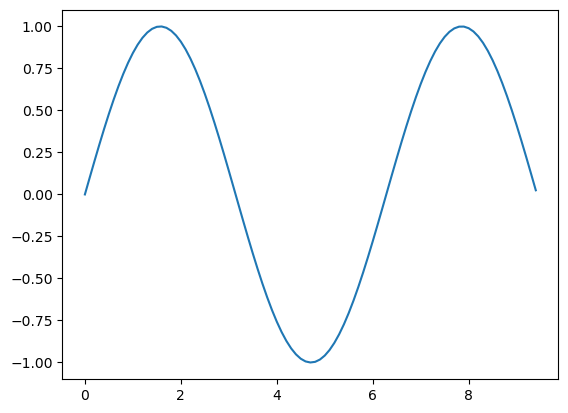

In [ ]:
x =np.arange(0,3*np.pi,0.1) # create an array from 0 to 3*pi in increments of 0.1
y = np.sin(x) # create an array of sin(x) values
print(y)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

# sin function is a numpy function that takes an array of values and returns an array of sin values.
# plot function is a matplotlib function that takes two arrays of the same length and plots one against the other.

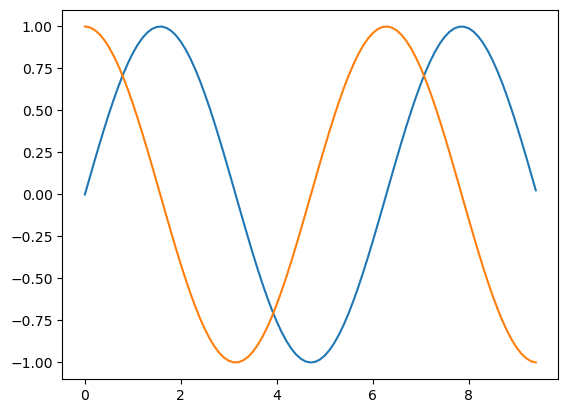

In [32]:
# can plot multiple lines on the same plot.
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

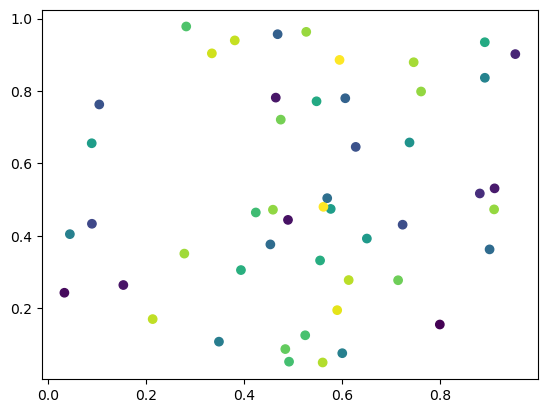

In [36]:

x = np.random.rand(50) # create an array of 50 random values between 0 and 1
y = np.random.rand(50) # create an array of 50 random values between 0 and 1
colors = np.random.rand(50) # create an array of 50 random values between 0 and 1

plt.scatter(x,y, c=colors) # scatter plot of x vs y with colors given by the array colors
plt.show()